In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import healpy as hp
import sys
sys.path.append('../')
from scipy.interpolate import InterpolatedUnivariateSpline
import emcee
from getdist import plots, MCSamples
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Sky, CMB
from dance.filtering import WienerFilter
from dance import utils
from dance.delens import Delens
from dance.spectra import Likelihood, Spectra

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [4]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [7]:
spec = Spectra(basedir,2048,2,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096,debias=True,bw=5)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence mode

Removed no burn in


/mnt/home/alonappan/anaconda3/envs/cosmo/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Removed no burn in
lensed \beta = 0.350\pm 0.013
delensed \beta = 0.3528\pm 0.0069


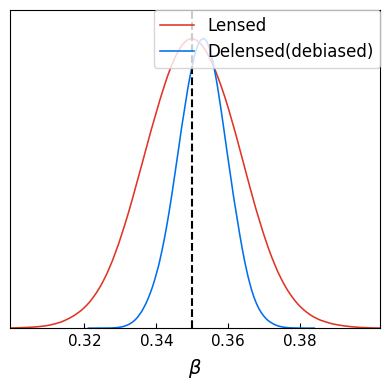

In [8]:
lh = Likelihood(basedir,spec,200)
lh.plot_compare()

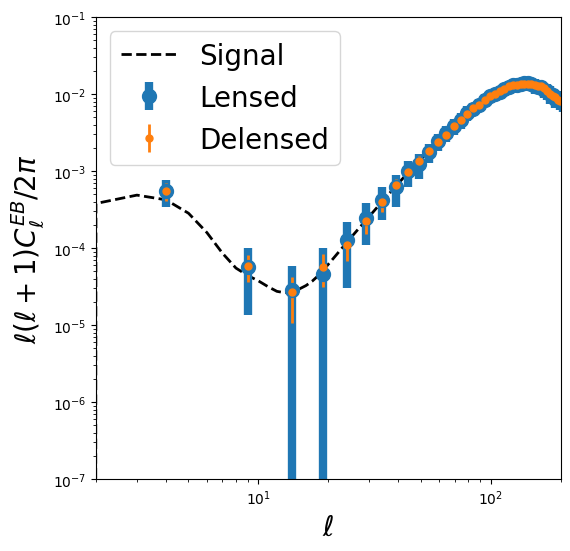

In [38]:
spec.plot_spectra()#savename='low_ell_EB.pdf')

/mnt/home/alonappan/workspace/dance/examples/../dance/spectra.py:221: RuntimeWarning: invalid value encountered in divide
  plt.plot(self.bdlens,data_ratio,label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed}$',c='r',lw=2)


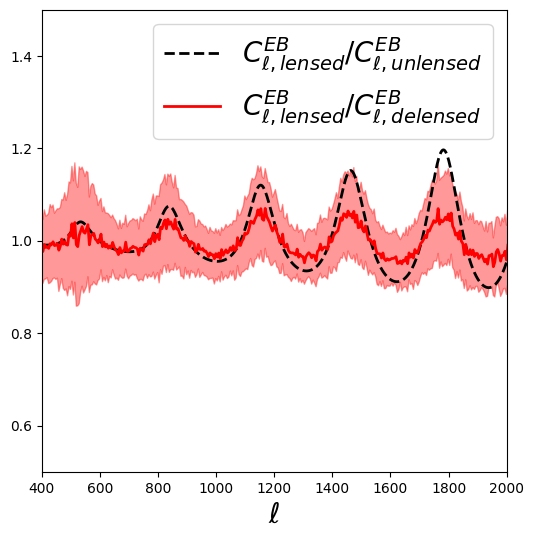

In [39]:
spec.plot_peaks()

Removed no burn in
Removed no burn in
lensed \beta = 0.351\pm 0.012
delensed \beta = 0.3516\pm 0.0063


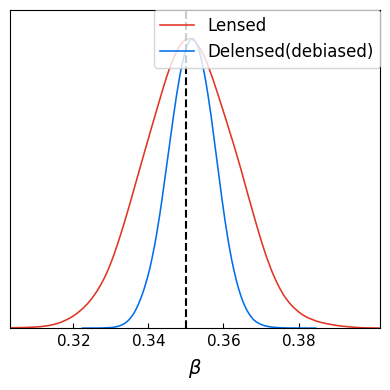

In [52]:
lh = Likelihood(basedir,spec,200)
lh.plot_compare(savename='low_ell_beta.pdf')
#plt.savefig('beta_compare_low_ell.pdf',bbox_inches='tight',dpi=300)

In [5]:
spec_b = Spectra(basedir,2048,1,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096,debias=False,bw=5)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power

In [6]:
d_debias = spec.plot_peaks(True)

/mnt/home/alonappan/workspace/dance/examples/../dance/spectra.py:221: RuntimeWarning: invalid value encountered in divide
  ratio = (self.eb_lens*self.dl) / (self.eb_unlens*self.dl)


In [7]:
d_biased = spec_b.plot_peaks(True)

/mnt/home/alonappan/workspace/dance/examples/../dance/spectra.py:221: RuntimeWarning: invalid value encountered in divide
  ratio = (self.eb_lens*self.dl) / (self.eb_unlens*self.dl)


In [8]:
d_debias.keys()

dict_keys(['ratio', 'dratio', 'dsratio'])

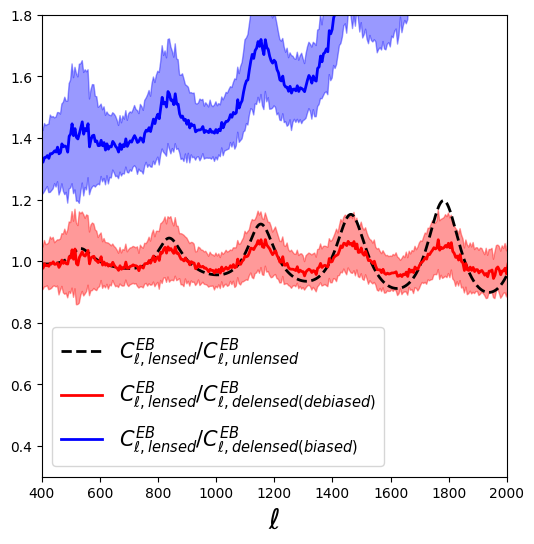

In [16]:
plt.figure(figsize=(6,6))
plt.plot(d_debias['ratio'],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,unlensed}$',c='k',lw=2,ls='--')
plt.plot(d_debias['dratio'][0],d_debias['dratio'][1],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed(debiased)}$',c='r',lw=2)
plt.fill_between(d_debias['dsratio'][0],d_debias['dsratio'][1],d_debias['dsratio'][2],alpha=0.4,color='r')
plt.plot(d_biased['dratio'][0],d_biased['dratio'][1],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed(biased)}$',c='b',lw=2)
plt.fill_between(d_biased['dsratio'][0],d_biased['dsratio'][1],d_biased['dsratio'][2],alpha=0.4,color='b')
plt.ylim(0.3,1.8)
plt.xlim(400,2000)
plt.xlabel(r'$\ell$',fontsize=20)
plt.legend(fontsize=15)
#plt.savefig('EBratio.pdf',bbox_inches='tight',dpi=300)

In [30]:
lh_b = Likelihood(basedir,spec_b,800)

In [31]:
lsamps = lh.get_lensed_samp()

Removed no burn in


In [33]:
d_b_samps = lh_b.get_delensed_samp(shift=0.08)
d_nb_samps = lh.get_delensed_samp()

Removed no burn in
Removed no burn in


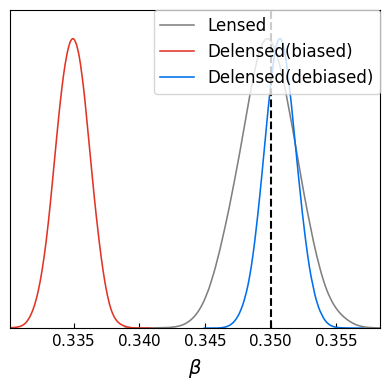

In [ ]:
g = plots.get_subplot_plotter(width_inch=4)
g.triangle_plot([lsamps,d_b_samps,d_nb_samps], filled=True)
plt.axvline(0.35, c='k', ls='--')
#plt.savefig('triangle.pdf',bbox_inches='tight',dpi=300)